In [1]:
import numpy as np
from numpy import genfromtxt

In [3]:
data = genfromtxt("DATA/bank_note_data.txt",delimiter=",")
data

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699,   0.     ],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ,   0.     ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645,   0.     ],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ,   1.     ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ,   1.     ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ,   1.     ]])

In [5]:
labels = data[:,4]
labels

array([0., 0., 0., ..., 1., 1., 1.])

In [6]:
features = data[:,:4]
features

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [7]:
X = features
y = labels

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.33 , random_state = 42)

/Users/gokhanersoz/opt/anaconda3/envs/tf2/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/gokhanersoz/opt/anaconda3/envs/tf2/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/gokhanersoz/opt/anaconda3/envs/tf2/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/gokhanersoz/opt/anaconda3/envs/tf2/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [10]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((919, 4), (453, 4), (919,), (453,))

In [12]:
X_train.max(),X_train.min()

(17.9274, -13.7731)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
model = Sequential()

model.add(Dense(units = 4, input_dim = 4, activation = "relu"))
model.add(Dense(units = 8, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(loss="binary_crossentropy",optimizer = "adam",metrics = ["accuracy"])
model.fit(X_train,y_train,epochs = 50, validation_data = (X_test,y_test))

Train on 919 samples, validate on 453 samples
Epoch 1/50
919/919 [==============================] - 1s 902us/sample - loss: 0.7027 - accuracy: 0.4505 - val_loss: 0.6965 - val_accuracy: 0.4327
Epoch 2/50
919/919 [==============================] - 0s 72us/sample - loss: 0.6898 - accuracy: 0.4679 - val_loss: 0.6869 - val_accuracy: 0.5099
Epoch 3/50
919/919 [==============================] - 0s 76us/sample - loss: 0.6843 - accuracy: 0.6616 - val_loss: 0.6817 - val_accuracy: 0.7042
Epoch 4/50
919/919 [==============================] - 0s 69us/sample - loss: 0.6807 - accuracy: 0.6703 - val_loss: 0.6780 - val_accuracy: 0.6711
Epoch 5/50
919/919 [==============================] - 0s 74us/sample - loss: 0.6777 - accuracy: 0.6561 - val_loss: 0.6750 - val_accuracy: 0.6645
Epoch 6/50
919/919 [==============================] - 0s 73us/sample - loss: 0.6751 - accuracy: 0.6398 - val_loss: 0.6718 - val_accuracy: 0.6578
Epoch 7/50
919/919 [==============================] - 0s 72us/sample - loss: 0.6718

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict_classes(X_test)

confusion_matrix(y_test,y_pred)

array([[246,  11],
       [ 34, 162]])

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92       257
         1.0       0.94      0.83      0.88       196

    accuracy                           0.90       453
   macro avg       0.91      0.89      0.90       453
weighted avg       0.90      0.90      0.90       453



---

In [24]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

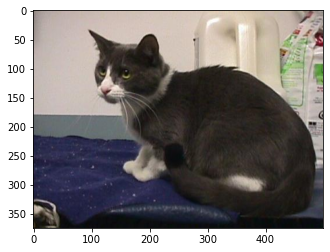

In [27]:
cat4 = cv2.imread("DATA/CATS_DOGS/train/CAT/4.jpg")
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

dog2 = cv2.imread("DATA/CATS_DOGS/train/DOG/2.jpg")
dog2 = cv2.cvtColor(dog2,cv2.COLOR_BGR2RGB)

plt.imshow(cat4)
plt.show()

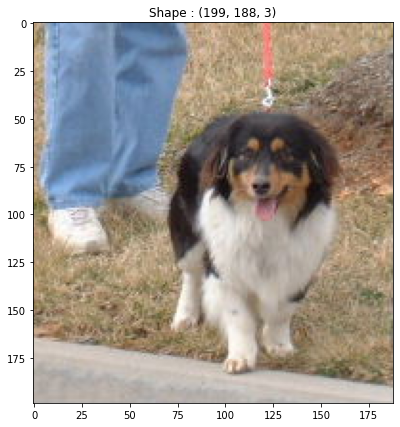

In [34]:
def display(image):
    
    fig = plt.figure(figsize = (7,7))
    ax = fig.add_subplot(111)
    ax.set_title(f"Shape : {image.shape}")
    ax.imshow(image)
    plt.show()
    
display(dog2)

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [70]:
image_gen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.2,
                               zoom_range=0.2,
                               rescale=1/255,
                               horizontal_flip=True,
                               fill_mode="nearest")

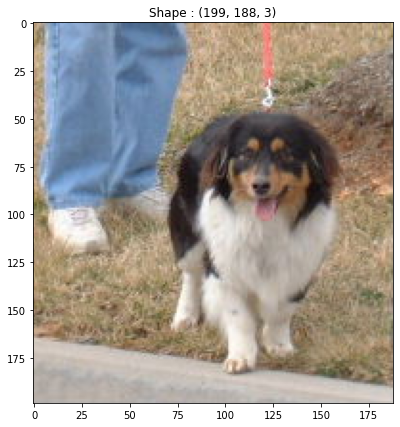

In [68]:
display(image_gen.random_transform(dog2))

In [69]:
image_gen.flow_from_directory("DATA/CATS_DOGS/train")

Found 18743 images belonging to 2 classes.


In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPool2D

In [74]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),input_shape = (150,150,3),activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation="relu"))

model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 32)       

In [76]:
model.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [77]:
image_shape = (150,150,3)

In [79]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory("DATA/CATS_DOGS/train",
                                                target_size = image_shape[:2],
                                                batch_size= batch_size,
                                                class_mode="binary")

test_image_gen = image_gen.flow_from_directory("DATA/CATS_DOGS/test",
                                                target_size = image_shape[:2],
                                                batch_size= batch_size,
                                                class_mode="binary")

Found 18743 images belonging to 2 classes.
Found 6251 images belonging to 2 classes.


In [80]:
train_image_gen.class_indices,test_image_gen.class_indices

({'CAT': 0, 'DOG': 1}, {'CAT': 0, 'DOG': 1})

In [81]:
from warnings import filterwarnings
filterwarnings("ignore")

In [82]:
results = model.fit_generator(train_image_gen,
                              epochs = 1,
                              steps_per_epoch = 150,
                              validation_data = test_image_gen,
                              validation_steps=12)

150/150 [==============================] - 105s 701ms/step - loss: 0.6943 - accuracy: 0.5192 - val_loss: 0.6893 - val_accuracy: 0.5938


In [87]:
model.evaluate(test_image_gen)

391/391 [==============================] - 165s 422ms/step - loss: 0.6906 - accuracy: 0.5289


[0.6906409663007692, 0.52887535]

In [89]:
import numpy as np
from tensorflow.keras.preprocessing import image

dog_file = "DATA/CATS_DOGS/train/Dog/2.jpg"

dog_img = image.load_img(dog_file, target_size = (150,150))

dog_img = image.img_to_array(dog_img)
print(dog_img.shape)

dog_img = np.expand_dims(dog_img, axis = 0)
print(dog_img.shape)

dog_img = dog_img / 255
print(dog_img.shape)

prediction_prob = model.predict(dog_img)

print(f"Probability that image is a dog is : {prediction_prob}")

(150, 150, 3)
(1, 150, 150, 3)
(1, 150, 150, 3)
Probability that image is a dog is : [[0.5099276]]


In [90]:
from tensorflow.keras.models import load_model,save_model

In [92]:
save_model(model,filepath="DATA/deneme.h5")